<a href="https://colab.research.google.com/github/Saket03-P/Ethereum-Transactions-Fraud-Detection/blob/main/MP_Data_Pre_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing on Ethereum Transactions Fraud Dataset 

[Initial Dataset](https://www.kaggle.com/datasets/vagifa/ethereum-frauddetection-dataset)


In [1]:
# Import necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[Follow Bonus Method on how to mount your google drive with colab](https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)

In [2]:
# Mounting Google Drive for the csv files.

from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Create a folder 'Mini_Project_2023' and store the initial dataset over there, to load to colab when necessary.
# Change path if csv file placed elsewhere in your drive.

dir_path= '/content/gdrive/MyDrive/Cost Sensitive Approach for Ethereum Transactions Fraud Detection using Machine Learning'
df_name= 'transaction_dataset.csv'

df= pd.read_csv(dir_path + '/' + df_name)

df.sample(5)

,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
7079,7079,4147,0xbdc17155f96b88f29ac1da50549e779686a14b10,0,17340.25,7524.06,452141.97,20,14,0,...,490.00,1004400.00,147602.42860,0.0,0.0,0.0,4.0,23.0,EOS,Bancor
614,614,615,0x0eb0bf07b1cc800c5a9c9e847ea41b58f4832911,0,22.16,0.00,66.47,3,1,0,...,0.00,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0,0
1577,1577,1578,0x28b79f487138e89b6b5db9d747a6114ef552c973,0,3894.60,123418.52,914559.38,13,7,0,...,0.00,0.00,0.00000,0.0,0.0,0.0,0.0,0.0,0,0
2287,2287,2288,0x3bb991f090c564334b7eabf63924961291510810,0,31730.32,4592.35,426687.28,12,10,0,...,0.11,1099.98,277.85754,0.0,0.0,0.0,3.0,16.0,REP,REP
5290,5290,2358,0x8c70be3bd384d21f7674d90d10aca41eb9d5605b,0,10246.23,0.00,20492.45,2,1,0,...,0.00,0.00,0.00000,0.0,0.0,0.0,0.0,9.0,None,Livepeer Token


In [4]:
# Initial dataset size.
df.shape

(9841, 51)

In [5]:
# Data types of the columns.
df.dtypes

Unnamed: 0                                                int64
Index                                                     int64
Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                            

**Data Pre Processing**

In [6]:
# Dropping unneccesary columns.
df.drop(['Address', 'Unnamed: 0', 'Index'], axis= 1, inplace= True)

In [7]:
# Dividing the columns as categoircal and continuous features.

categorical_features=  [' ERC20 most sent token type', ' ERC20_most_rec_token_type']
continuous_features= ['FLAG', 'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tnx',
       ' ERC20 avg time between rec 2 tnx',
       ' ERC20 avg time between contract tnx', ' ERC20 min val rec',
       ' ERC20 max val rec', ' ERC20 avg val rec', ' ERC20 min val sent',
       ' ERC20 max val sent', ' ERC20 avg val sent',
       ' ERC20 min val sent contract', ' ERC20 max val sent contract',
       ' ERC20 avg val sent contract', ' ERC20 uniq sent token name',
' ERC20 uniq rec token name']

In [8]:
# Encoding categorical data to integer values for CTGAN.

for col in categorical_features:
  df[col] = df[col].astype('category').cat.codes

In [9]:
df.describe()

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
count,9841.000000,9841.000000,9841.000000,9.841000e+03,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,9841.000000,...,9.012000e+03,9.012000e+03,9.012000e+03,9012.0,9012.0,9012.0,9012.000000,9012.000000,9841.000000,9841.000000
mean,0.221421,5086.878721,8004.851184,2.183333e+05,115.931714,163.700945,3.729702,30.360939,25.840159,43.845153,...,1.174126e+04,1.303594e+07,6.318389e+06,0.0,0.0,0.0,1.384931,4.826676,63.010162,105.883447
std,0.415224,21486.549974,23081.714801,3.229379e+05,757.226361,940.836550,141.445583,298.621112,263.820410,325.929139,...,1.053567e+06,1.179905e+09,5.914764e+08,0.0,0.0,0.0,6.735121,16.678607,89.760768,140.990653
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,-1.000000,-1.000000
25%,0.000000,0.000000,0.000000,3.169300e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000,4.000000,3.000000
50%,0.000000,17.340000,509.770000,4.663703e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095856,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000,4.000000,3.000000
75%,0.000000,565.470000,5480.390000,3.040710e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,2.000000,185.000000,202.000000
max,1.000000,430287.670000,482175.490000,1.954861e+06,10000.000000,10000.000000,9995.000000,9999.000000,9287.000000,10000.000000,...,1.000000e+08,1.120000e+11,5.614756e+10,0.0,0.0,0.0,213.000000,737.000000,304.000000,466.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 48 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   FLAG                                                  9841 non-null   int64  
 1   Avg min between sent tnx                              9841 non-null   float64
 2   Avg min between received tnx                          9841 non-null   float64
 3   Time Diff between first and last (Mins)               9841 non-null   float64
 4   Sent tnx                                              9841 non-null   int64  
 5   Received Tnx                                          9841 non-null   int64  
 6   Number of Created Contracts                           9841 non-null   int64  
 7   Unique Received From Addresses                        9841 non-null   int64  
 8   Unique Sent To Addresses                              9841

In [11]:
# Printing column-wise number of unique values.
for col in df:print(f'{col} : {len(df[col].unique())}')

FLAG : 2
Avg min between sent tnx : 5013
Avg min between received tnx : 6223
Time Diff between first and last (Mins) : 7810
Sent tnx : 641
Received Tnx : 727
Number of Created Contracts : 20
Unique Received From Addresses : 256
Unique Sent To Addresses : 258
min value received : 4589
max value received  : 6302
avg val received : 6767
min val sent : 4719
max val sent : 6647
avg val sent : 5854
min value sent to contract : 3
max val sent to contract : 4
avg value sent to contract : 4
total transactions (including tnx to create contract : 897
total Ether sent : 5868
total ether received : 6728
total ether sent contracts : 4
total ether balance : 5717
 Total ERC20 tnxs : 301
 ERC20 total Ether received : 3461
 ERC20 total ether sent : 1416
 ERC20 total Ether sent contract : 30
 ERC20 uniq sent addr : 108
 ERC20 uniq rec addr : 148
 ERC20 uniq sent addr.1 : 5
 ERC20 uniq rec contract addr : 124
 ERC20 avg time between sent tnx : 2
 ERC20 avg time between rec tnx : 2
 ERC20 avg time between 

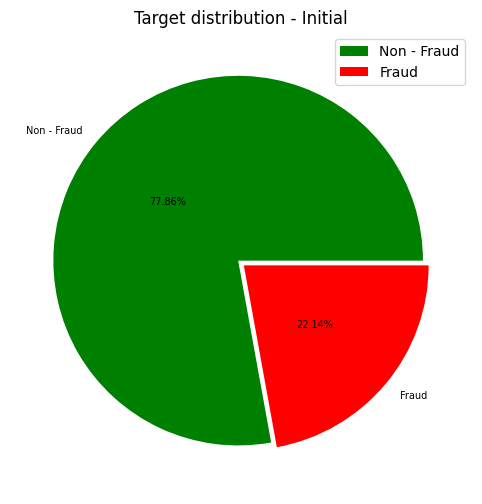

In [12]:
# Distribution of Non Fraud to Fraud instances using the Pie Chart.

pie, ax = plt.subplots(figsize=[8,6])
labels = ['Non - Fraud', 'Fraud']
colors = ['green', 'red']
plt.pie(x = df['FLAG'].value_counts(), autopct='%.2f%%', explode=[0.02]*2, labels=labels, pctdistance=0.5, textprops={'fontsize': 7}, colors = colors)
plt.title('Target distribution - Initial')
plt.legend()
plt.show()

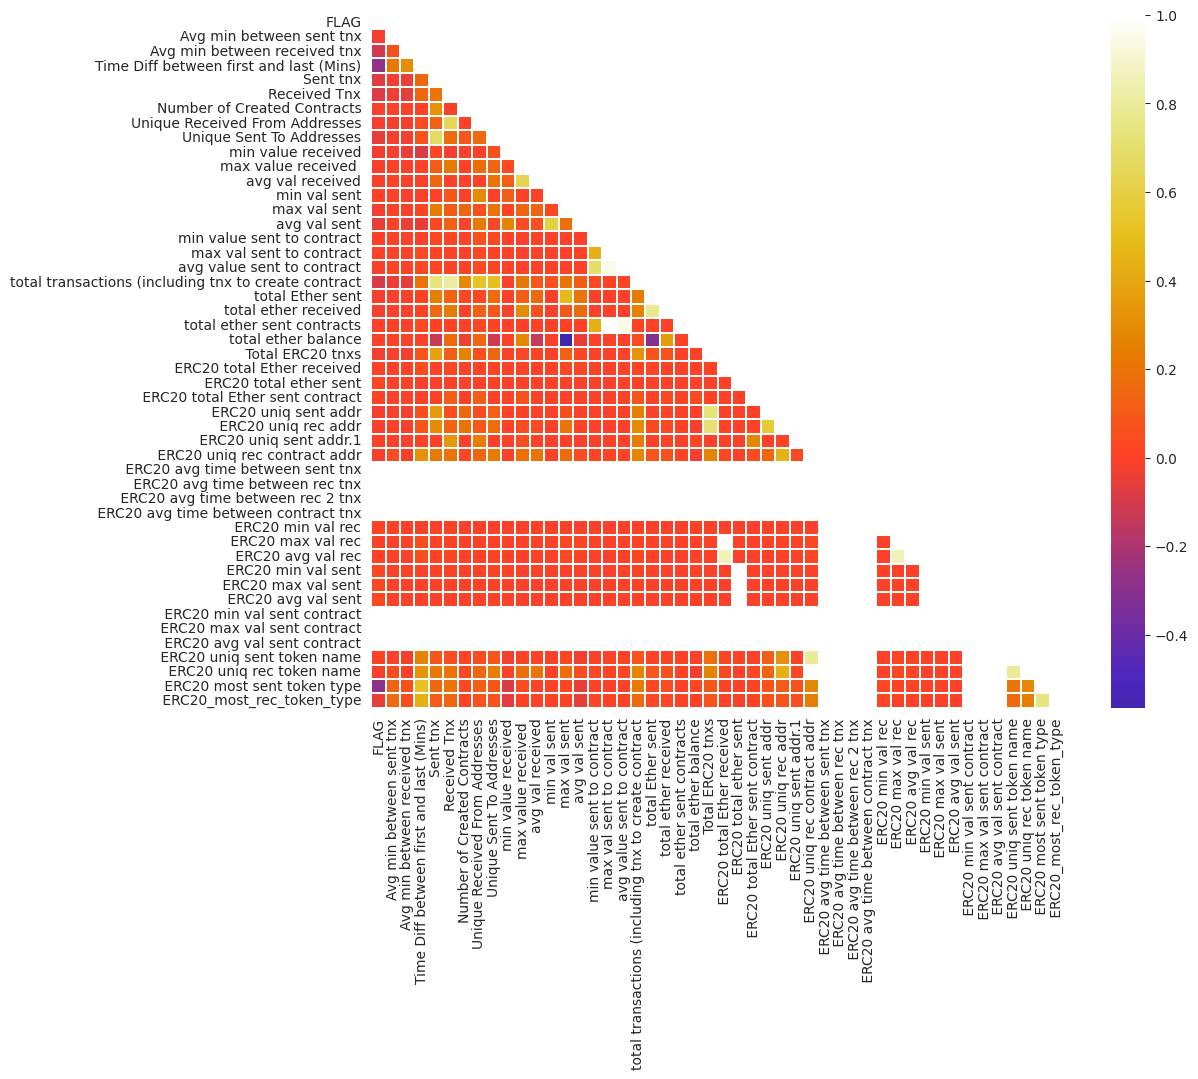

In [13]:
# Correlation Matrix for Features.
corr= df.corr()

mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True

with sns.axes_style('white'):
  fig, ax= plt.subplots(figsize=(12,9))
  sns.heatmap(corr, mask= mask, annot= False, cmap= 'CMRmap', center= 0, square= True, linewidths= 0.1)

If a particular column has zero variance, it means that all its values are the same. This column cannot provide any information or variation, and it is, therefore, not correlated with any other columns in the dataset.

Correlation measures the linear relationship between two variables. Since a column with zero variance cannot vary, it cannot have any linear relationship with any other column in the dataset. Thus, the correlation between a column with zero variance and the rest of the columns in the dataset is zero.

In [14]:
# finding NaNs per column.
df.isnull().sum()

FLAG                                                      0
Avg min between sent tnx                                  0
Avg min between received tnx                              0
Time Diff between first and last (Mins)                   0
Sent tnx                                                  0
Received Tnx                                              0
Number of Created Contracts                               0
Unique Received From Addresses                            0
Unique Sent To Addresses                                  0
min value received                                        0
max value received                                        0
avg val received                                          0
min val sent                                              0
max val sent                                              0
avg val sent                                              0
min value sent to contract                                0
max val sent to contract                

In [15]:
# Replace missings of numerical variables with mode of the column
df.fillna(df.mode().iloc[0], inplace= True)

In [16]:
# Colwise variance
df.var()

FLAG                                                    1.724110e-01
Avg min between sent tnx                                4.616718e+08
Avg min between received tnx                            5.327656e+08
Time Diff between first and last (Mins)                 1.042889e+11
Sent tnx                                                5.733918e+05
Received Tnx                                            8.851734e+05
Number of Created Contracts                             2.000685e+04
Unique Received From Addresses                          8.917457e+04
Unique Sent To Addresses                                6.960121e+04
min value received                                      1.062298e+05
max value received                                      1.692294e+08
avg val received                                        8.323238e+06
min val sent                                            1.921264e+04
max val sent                                            4.394646e+07
avg val sent                      

In [17]:
# Filtering the features with 0 variance

no_var= (df.var() == 0)
df.var()[no_var]

 ERC20 avg time between sent tnx        0.0
 ERC20 avg time between rec tnx         0.0
 ERC20 avg time between rec 2 tnx       0.0
 ERC20 avg time between contract tnx    0.0
 ERC20 min val sent contract            0.0
 ERC20 max val sent contract            0.0
 ERC20 avg val sent contract            0.0
dtype: float64

In [18]:
# Drop features with 0 variance --- these features will not help in the performance of the model

df.drop(df.var()[no_var].index, axis= 1, inplace= True)
df.shape

(9841, 41)

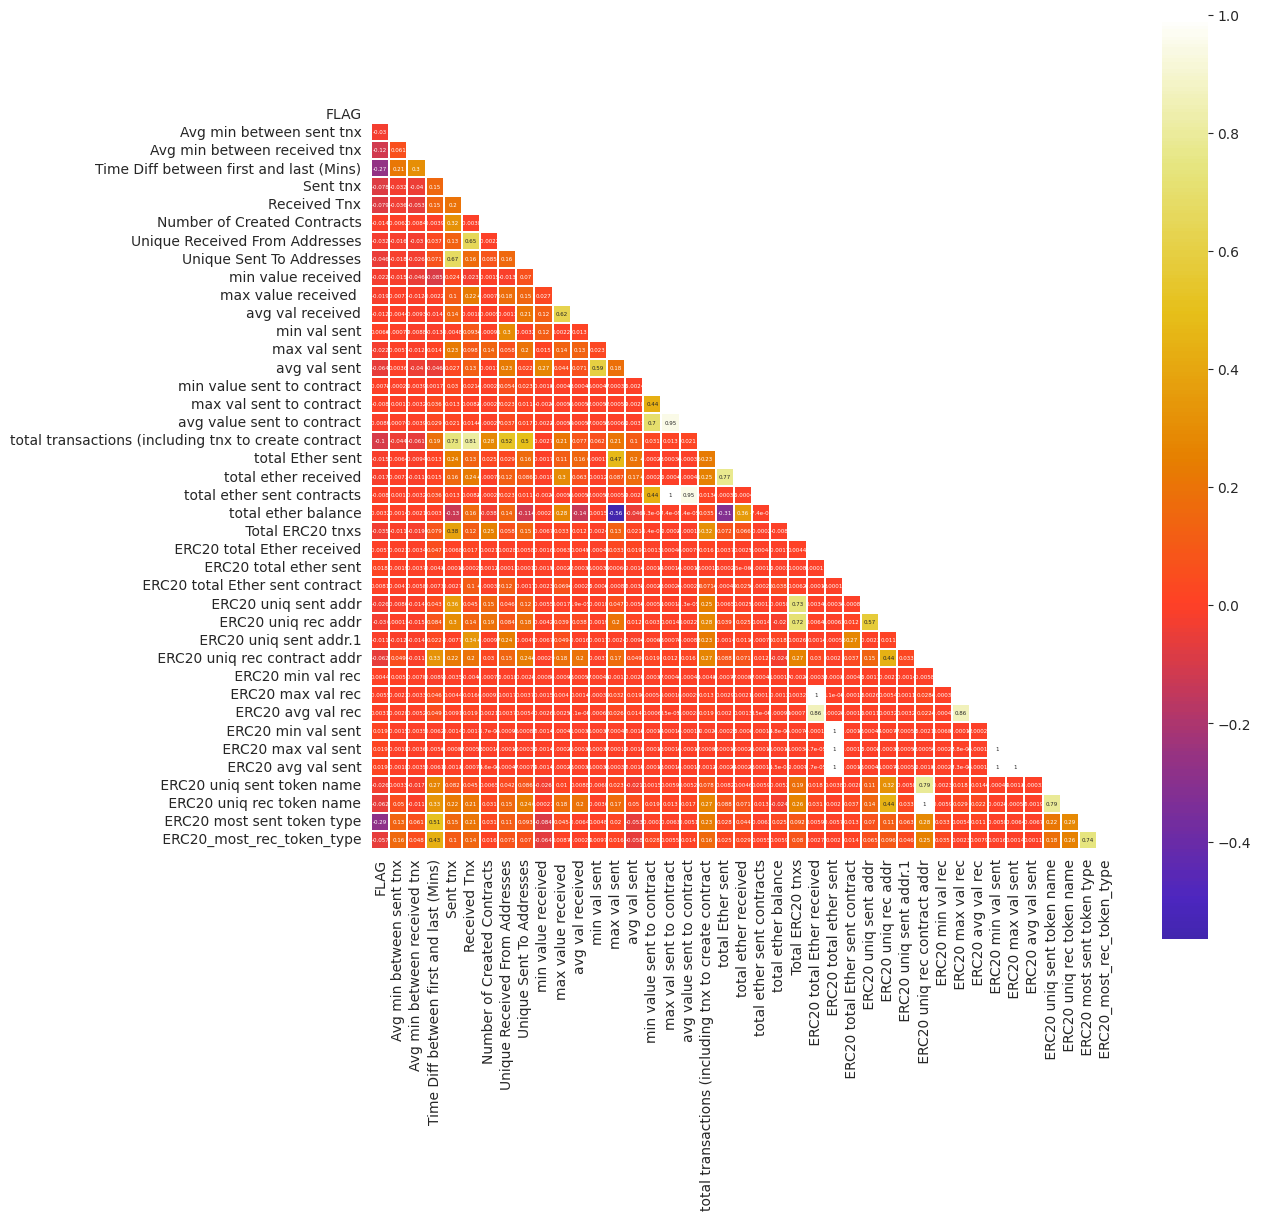

In [19]:
corr= df.corr()

mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
with sns.axes_style('white'):
  fig, ax= plt.subplots(figsize= (12, 12))
  sns.heatmap(corr, mask= mask, annot= True, cmap= 'CMRmap', center= 0, linewidths= 0.1, square= True, annot_kws= {"size": 4})

In [20]:
sorted_corr= corr.sort_values(by=[ 'FLAG'], key= abs)
sorted_corr

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
ERC20 avg val rec,0.003132,-0.002829,-0.005241,0.049160,0.009104,0.019382,0.002096,0.003741,0.005412,-0.002610,...,-0.000455,0.859766,1.000000,-0.000205,-0.000117,-0.000123,0.013764,0.022346,0.010583,0.007942
total ether balance,-0.003229,-0.001425,-0.002149,0.002955,-0.127211,0.158146,-0.037902,0.144949,-0.113428,-0.000233,...,-0.000170,-0.001251,-0.000991,-0.000048,-0.000112,-0.000065,-0.005164,-0.023746,0.024509,0.005894
ERC20 min val rec,0.004434,0.004998,-0.007794,-0.008921,-0.003480,-0.004043,-0.000724,-0.001784,-0.002093,-0.000847,...,1.000000,-0.000311,-0.000455,0.006815,-0.000280,-0.000265,-0.002288,-0.005860,0.033196,0.034907
ERC20 max val rec,-0.005510,-0.002260,-0.003326,0.046278,0.004445,0.015522,0.000946,0.001691,0.003696,-0.001528,...,-0.000311,1.000000,0.859766,-0.000121,-0.000078,-0.000083,0.017746,0.028520,0.005449,0.002333
ERC20 total Ether received,-0.005711,-0.002339,-0.003430,0.046570,0.006840,0.016648,0.002099,0.002832,0.005809,-0.001580,...,-0.000322,0.999967,0.859823,-0.000125,-0.000047,-0.000057,0.018349,0.030955,0.005916,0.002744
min val sent,0.006626,-0.000789,-0.008761,-0.013107,-0.004846,0.093448,-0.000913,0.296240,-0.003166,0.117682,...,-0.000446,-0.000393,-0.000663,-0.000369,-0.000366,-0.000353,-0.006785,-0.003631,0.004835,0.009673
min value sent to contract,-0.007213,-0.000210,-0.003916,0.001734,0.029529,0.020645,-0.000261,0.053946,0.023183,-0.001820,...,-0.000372,0.000541,0.000598,-0.000144,-0.000134,-0.000134,0.001533,0.019350,-0.000303,0.027961
max val sent to contract,-0.007988,0.001044,-0.003230,0.036162,0.013263,0.008243,-0.000225,0.023258,0.010926,-0.002015,...,-0.000412,0.000133,0.000085,-0.000160,-0.000155,-0.000151,0.005911,0.012747,-0.006296,0.005536
total ether sent contracts,-0.007988,0.001044,-0.003230,0.036162,0.013263,0.008243,-0.000225,0.023258,0.010926,-0.002015,...,-0.000412,0.000133,0.000085,-0.000160,-0.000155,-0.000151,0.005911,0.012747,-0.006296,0.005536
ERC20 total Ether sent contract,0.008127,-0.004101,-0.005813,-0.007337,-0.002652,0.104939,-0.000334,0.116755,-0.001697,-0.002331,...,-0.000477,-0.000125,-0.000154,-0.000184,-0.000183,-0.000177,-0.002817,0.036935,0.013362,0.014407


In [21]:
sorted_corr['FLAG']

 ERC20 avg val rec                                      0.003132
total ether balance                                    -0.003229
 ERC20 min val rec                                      0.004434
 ERC20 max val rec                                     -0.005510
 ERC20 total Ether received                            -0.005711
min val sent                                            0.006626
min value sent to contract                             -0.007213
max val sent to contract                               -0.007988
total ether sent contracts                             -0.007988
 ERC20 total Ether sent contract                        0.008127
avg value sent to contract                             -0.008883
 ERC20 uniq sent addr.1                                -0.011148
avg val received                                       -0.011881
Number of Created Contracts                            -0.013711
total Ether sent                                       -0.014993
total ether received     

In [22]:
# dropping one the columns from every pair of highly correlated columsns, as both provide the same information.

drop = ['total transactions (including tnx to create contract', ' ERC20 avg val rec',
        ' ERC20 avg val rec',' ERC20 max val rec', ' ERC20 min val rec', ' ERC20 uniq rec contract addr', 'max val sent', ' ERC20 avg val sent',
        ' ERC20 min val sent', ' ERC20 max val sent', ' Total ERC20 tnxs', 'Unique Sent To Addresses',
        'Unique Received From Addresses', 'total ether received', ' ERC20 uniq sent token name', 'min value received', 'min val sent', ' ERC20 uniq rec addr' ]
        
df.drop(drop, axis= 1, inplace= True)

Columns with high corelation with target column may lead to overfitting, and also increase computations; as we are also making use of CTGAN, it is better to drop such columns as well.

In [23]:
# Some features present only within a small distribution.

for i in df.columns[1:]:
    if len(df[i].value_counts()) < 10:
        print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
        print('======================================')

The column min value sent to contract has the following distribution: 
0.00    9839
0.02       1
0.01       1
Name: min value sent to contract, dtype: int64
The column max val sent to contract has the following distribution: 
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: max val sent to contract, dtype: int64
The column avg value sent to contract has the following distribution: 
0.000000    9838
0.020000       1
0.010000       1
0.023014       1
Name: avg value sent to contract, dtype: int64
The column total ether sent contracts has the following distribution: 
0.000000    9838
0.020000       1
0.010000       1
0.046029       1
Name: total ether sent contracts, dtype: int64
The column  ERC20 uniq sent addr.1 has the following distribution: 
0.0    9813
1.0      26
3.0       1
2.0       1
Name:  ERC20 uniq sent addr.1, dtype: int64


In [24]:
# Dropping columns within a small distribution and containing mostly 0s.

df.drop(['min value sent to contract', 'max val sent to contract', 'avg value sent to contract', 'total ether sent contracts', ' ERC20 uniq sent addr.1'], axis= 1, inplace= True)
df.shape

(9841, 19)

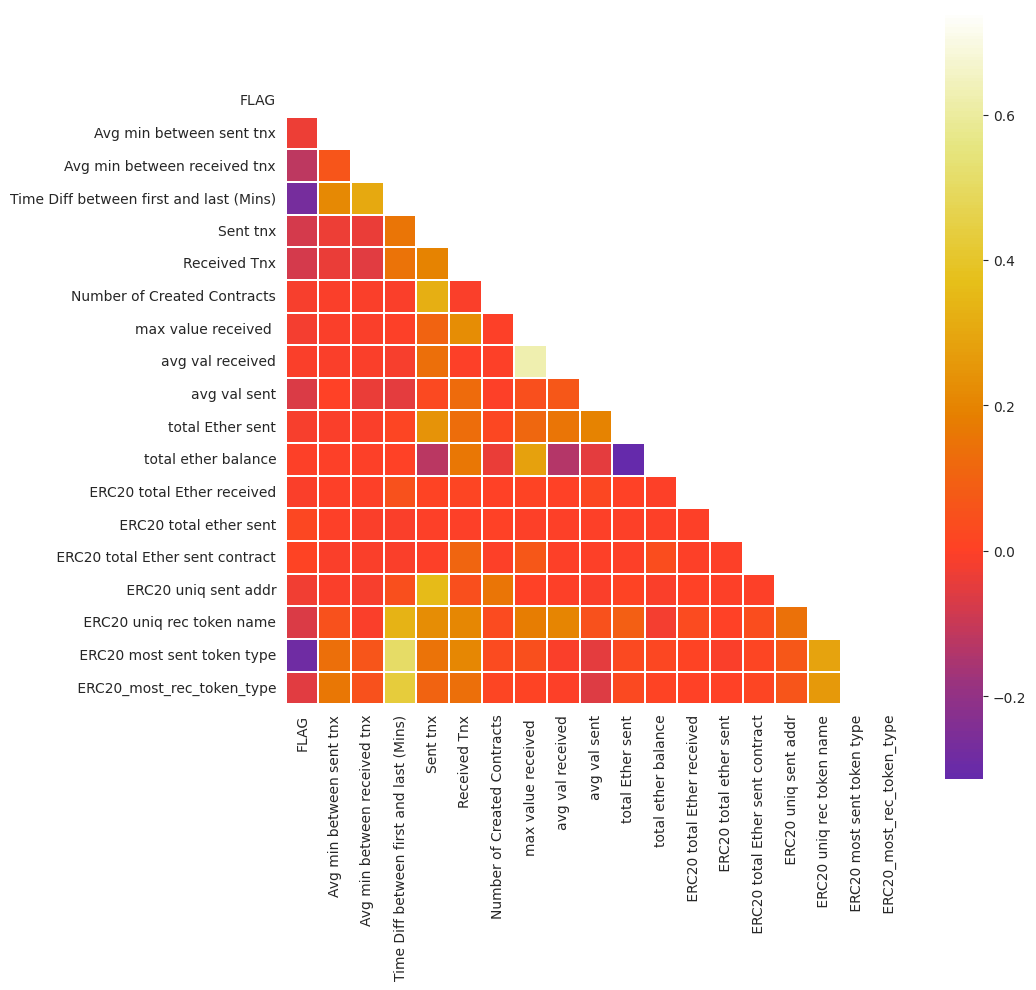

In [25]:
# Rechecking the Correlation matrix.
corr= df.corr()

mask= np.zeros_like(corr)
mask[np.triu_indices_from(mask)]= True
with sns.axes_style('white'):
  fig, ax= plt.subplots(figsize= (10, 10))
  sns.heatmap(corr, mask= mask, annot= False, cmap= 'CMRmap', center= 0, linewidths= 0.1, square= True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   FLAG                                     9841 non-null   int64  
 1   Avg min between sent tnx                 9841 non-null   float64
 2   Avg min between received tnx             9841 non-null   float64
 3   Time Diff between first and last (Mins)  9841 non-null   float64
 4   Sent tnx                                 9841 non-null   int64  
 5   Received Tnx                             9841 non-null   int64  
 6   Number of Created Contracts              9841 non-null   int64  
 7   max value received                       9841 non-null   float64
 8   avg val received                         9841 non-null   float64
 9   avg val sent                             9841 non-null   float64
 10  total Ether sent                         9841 no

In [27]:
dfc= df.copy(deep= True)

In [28]:
# creating categorical Class Labels.
dfc['FLAG']= dfc['FLAG'].map({0: 'Non - Fraud', 1: 'Fraud'})

In [29]:
# randomize the rows of the DataFrame.
# used since the above cell sorts the data according to class labels.

dfc= dfc.sample(frac= 1).reset_index(drop= True)

In [30]:
# Saving pre processed dataframe into the same google drive folder.
path= dir_path + '/' + 'pre_processed_transaction_dataset.csv'

with open(path, 'w', encoding = 'utf-8-sig') as f:
  dfc.to_csv(f)

<hr>

In [ ]:
# # Remove columns with categorical features.
# for col in categorical_features:
#   df.drop([col], axis= 1, inplace= True)

# # Some features present only within a small distribution, and can be dropped
# for i in df.columns[1:]:
#     if len(df[i].value_counts()) < 10:
#         print(f'The column {i} has the following distribution: \n{df[i].value_counts()}')
#         print('======================================')

# df.drop(['min value sent to contract', 'max val sent to contract', 
#          'avg value sent to contract', 'total ether sent contracts', 
#         ' ERC20 uniq sent addr.1'], axis= 1, inplace= True)